# Udemy

In [286]:
import os
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [287]:
folders = f"{os.getcwd()}".split('/')[:-1]
folders.extend(['udemy'])
path = os.path.join(*folders)
path = '/'+path
print(path)

/Users/school/Desktop/Github Repositories/CSE-5099/udemy


## Section 1

(1) Linear Regression Example (Age of Universe)

In [288]:
uni_df = pd.read_csv(
    filepath_or_buffer= os.path.join(path, 'hubble.csv')
)

display(HTML(uni_df.to_html()))

,Galaxy,y,x
0,NGC0300,133,2.00
1,NGC0925,664,9.16
2,NGC1326A,1794,16.14
3,NGC1365,1594,17.95
4,NGC1425,1473,21.88
5,NGC2403,278,3.22
6,NGC2541,714,11.22
7,NGC2090,882,11.75
8,NGC3031,80,3.63
9,NGC3198,772,13.80


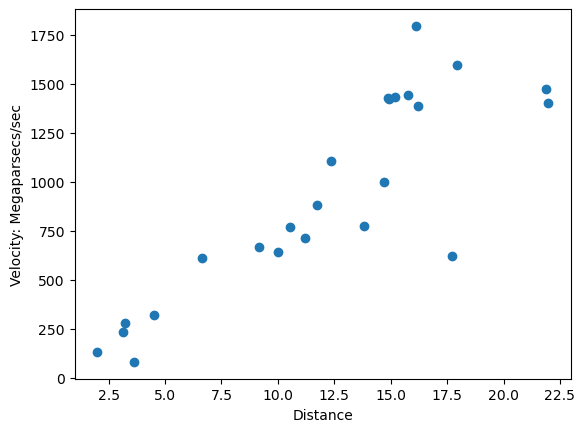

In [289]:
plt.plot(
    uni_df['x'], # vel
    uni_df['y'], # dist
    'o'
)
plt.xlabel(
    xlabel= "Distance"
)
plt.ylabel(
    ylabel= "Velocity: Megaparsecs/sec"
)

plt.show()

In [290]:
model = smf.ols(
    formula='y~x-1',
    #! -1 means no intercept
    data= uni_df[['x', 'y']]).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              373.1
Date:                Fri, 28 Mar 2025   Prob (F-statistic):                    1.03e-15
Time:                        09:46:09   Log-Likelihood:                         -166.90
No. Observations:                  24   AIC:                                      335.8
Df Residuals:                      23   BIC:                                      337.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [291]:
beta = model.params.iloc[0]
print(beta)

76.58117202916935


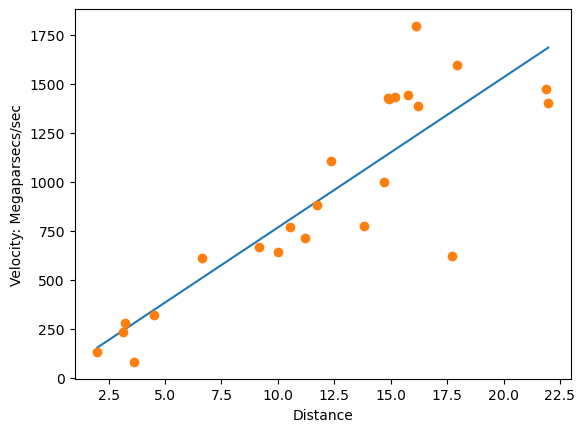

In [292]:
a = np.linspace(uni_df['x'].min(), uni_df['x'].max(), 100)
b = a * beta
plt.plot(a, b)

plt.plot(
    uni_df['x'], # vel
    uni_df['y'], # dist
    'o'
)
plt.xlabel(
    xlabel= "Distance"
)
plt.ylabel(
    ylabel= "Velocity: Megaparsecs/sec"
)

plt.show()

- Fitted values: measures of Y (mean value of Y)
    - Assumptions ^: Independent residuals and with constant variance
    - DON'T want to see a trend-line go up or down
    - OR DON'T want to see it spread out as values of Y increase or decrease


Here as the mean value of Y increase, its variances also increases

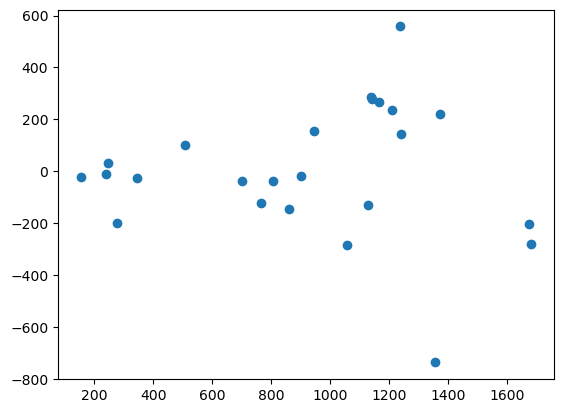

In [293]:
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, residuals)

plt.show()

Udemy says to that the most upper and lower points (row 3 & 15) could be outliers and lets fit another model with it not included.

In [294]:
uni_df = uni_df.drop(index=[2,14], axis=1)
display(HTML(uni_df.to_html()))

,Galaxy,y,x
0,NGC0300,133,2.00
1,NGC0925,664,9.16
3,NGC1365,1594,17.95
4,NGC1425,1473,21.88
5,NGC2403,278,3.22
6,NGC2541,714,11.22
7,NGC2090,882,11.75
8,NGC3031,80,3.63
9,NGC3198,772,13.80
10,NGC3351,642,10.00


In [295]:
model2 = smf.ols(
    formula='y~x-1',
    #! -1 means no intercept
    data= uni_df[['x', 'y']]).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              683.8
Date:                Fri, 28 Mar 2025   Prob (F-statistic):                    1.66e-17
Time:                        09:46:09   Log-Likelihood:                         -145.01
No. Observations:                  22   AIC:                                      292.0
Df Residuals:                      21   BIC:                                      293.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

76.58117202916935


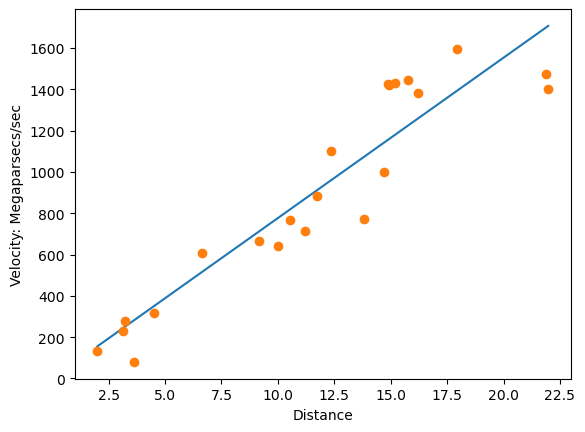

In [296]:
beta2 = model2.params.iloc[0]
print(beta)

a = np.linspace(uni_df['x'].min(), uni_df['x'].max(), 100)
b = a * beta2
plt.plot(a, b)

plt.plot(
    uni_df['x'], # vel
    uni_df['y'], # dist
    'o'
)
plt.xlabel(
    xlabel= "Distance"
)
plt.ylabel(
    ylabel= "Velocity: Megaparsecs/sec"
)

plt.show()

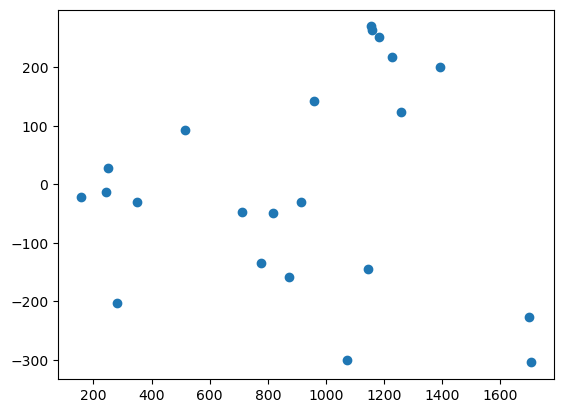

In [297]:
residuals2 = model2.resid
fitted2 = model2.fittedvalues
plt.scatter(fitted2, residuals2)
plt.show()

In [298]:
hubble_const = (beta/3.09e19, beta2/3.09e19)
print(hubble_const)

age = (1/hubble_const[0], 1/hubble_const[1])
age = (age[0]/(60^2*24*365), age[1]/(60^2*24*365))
print(age)

(np.float64(2.478355081850141e-18), np.float64(2.5136866492097877e-18))
(np.float64(23077867360554.043), np.float64(22753492313480.164))


In [ ]:
HUBBLE = 4.35*(10^17)
print(age[0]/HUBBLE, age[1]/HUBBLE)

196490994981.30307 193729181042.82816


- How to tell if this is a good estimate?
    - What is the CI

Assumptions of $\hat\beta$
- that error terms $\epsilon = N(0, \sigma^2)$ for all i, which impiles that $Y_{i} = N(x_{i}*\beta, \sigma^2)$

## Section 2
### GLM

**Notes:**


Linear Models
- Assume constant variance at different values of Y
- Assume normally distributed error terms

GLM
- Allow for *specification* of the error distribution
    - Poisson, Binomial, Gamma, Exponential

<img src="error structures.png" width="600" height="500">

Linear predictor $\eta$ is the linear sum of the effects of $\eta_{i} = \sum_{j=1}^{p} x_{ij}*\beta_{j}$
- Right hand side of eq is called "linear structure"

...